## 1. Import Library

In [ ]:
import marimo as mo 
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn
import torch.nn.functional as F

## 2. Import Dataset

In [ ]:
data_diabetes = pd.read_csv("diabetes.csv")
data_diabetes

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


## 3. Exploratory Data Analysis

### a. Check Missing Value

In [ ]:
data_diabetes.isnull().sum()

,0
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
...,...
bp.2s,262
bp.2d,262
waist,2
hip,2


### b. Check Data Information

In [ ]:
data_diabetes.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


### c. Check Data Description

In [ ]:
data_diabetes.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


### d. Dataset Visualization

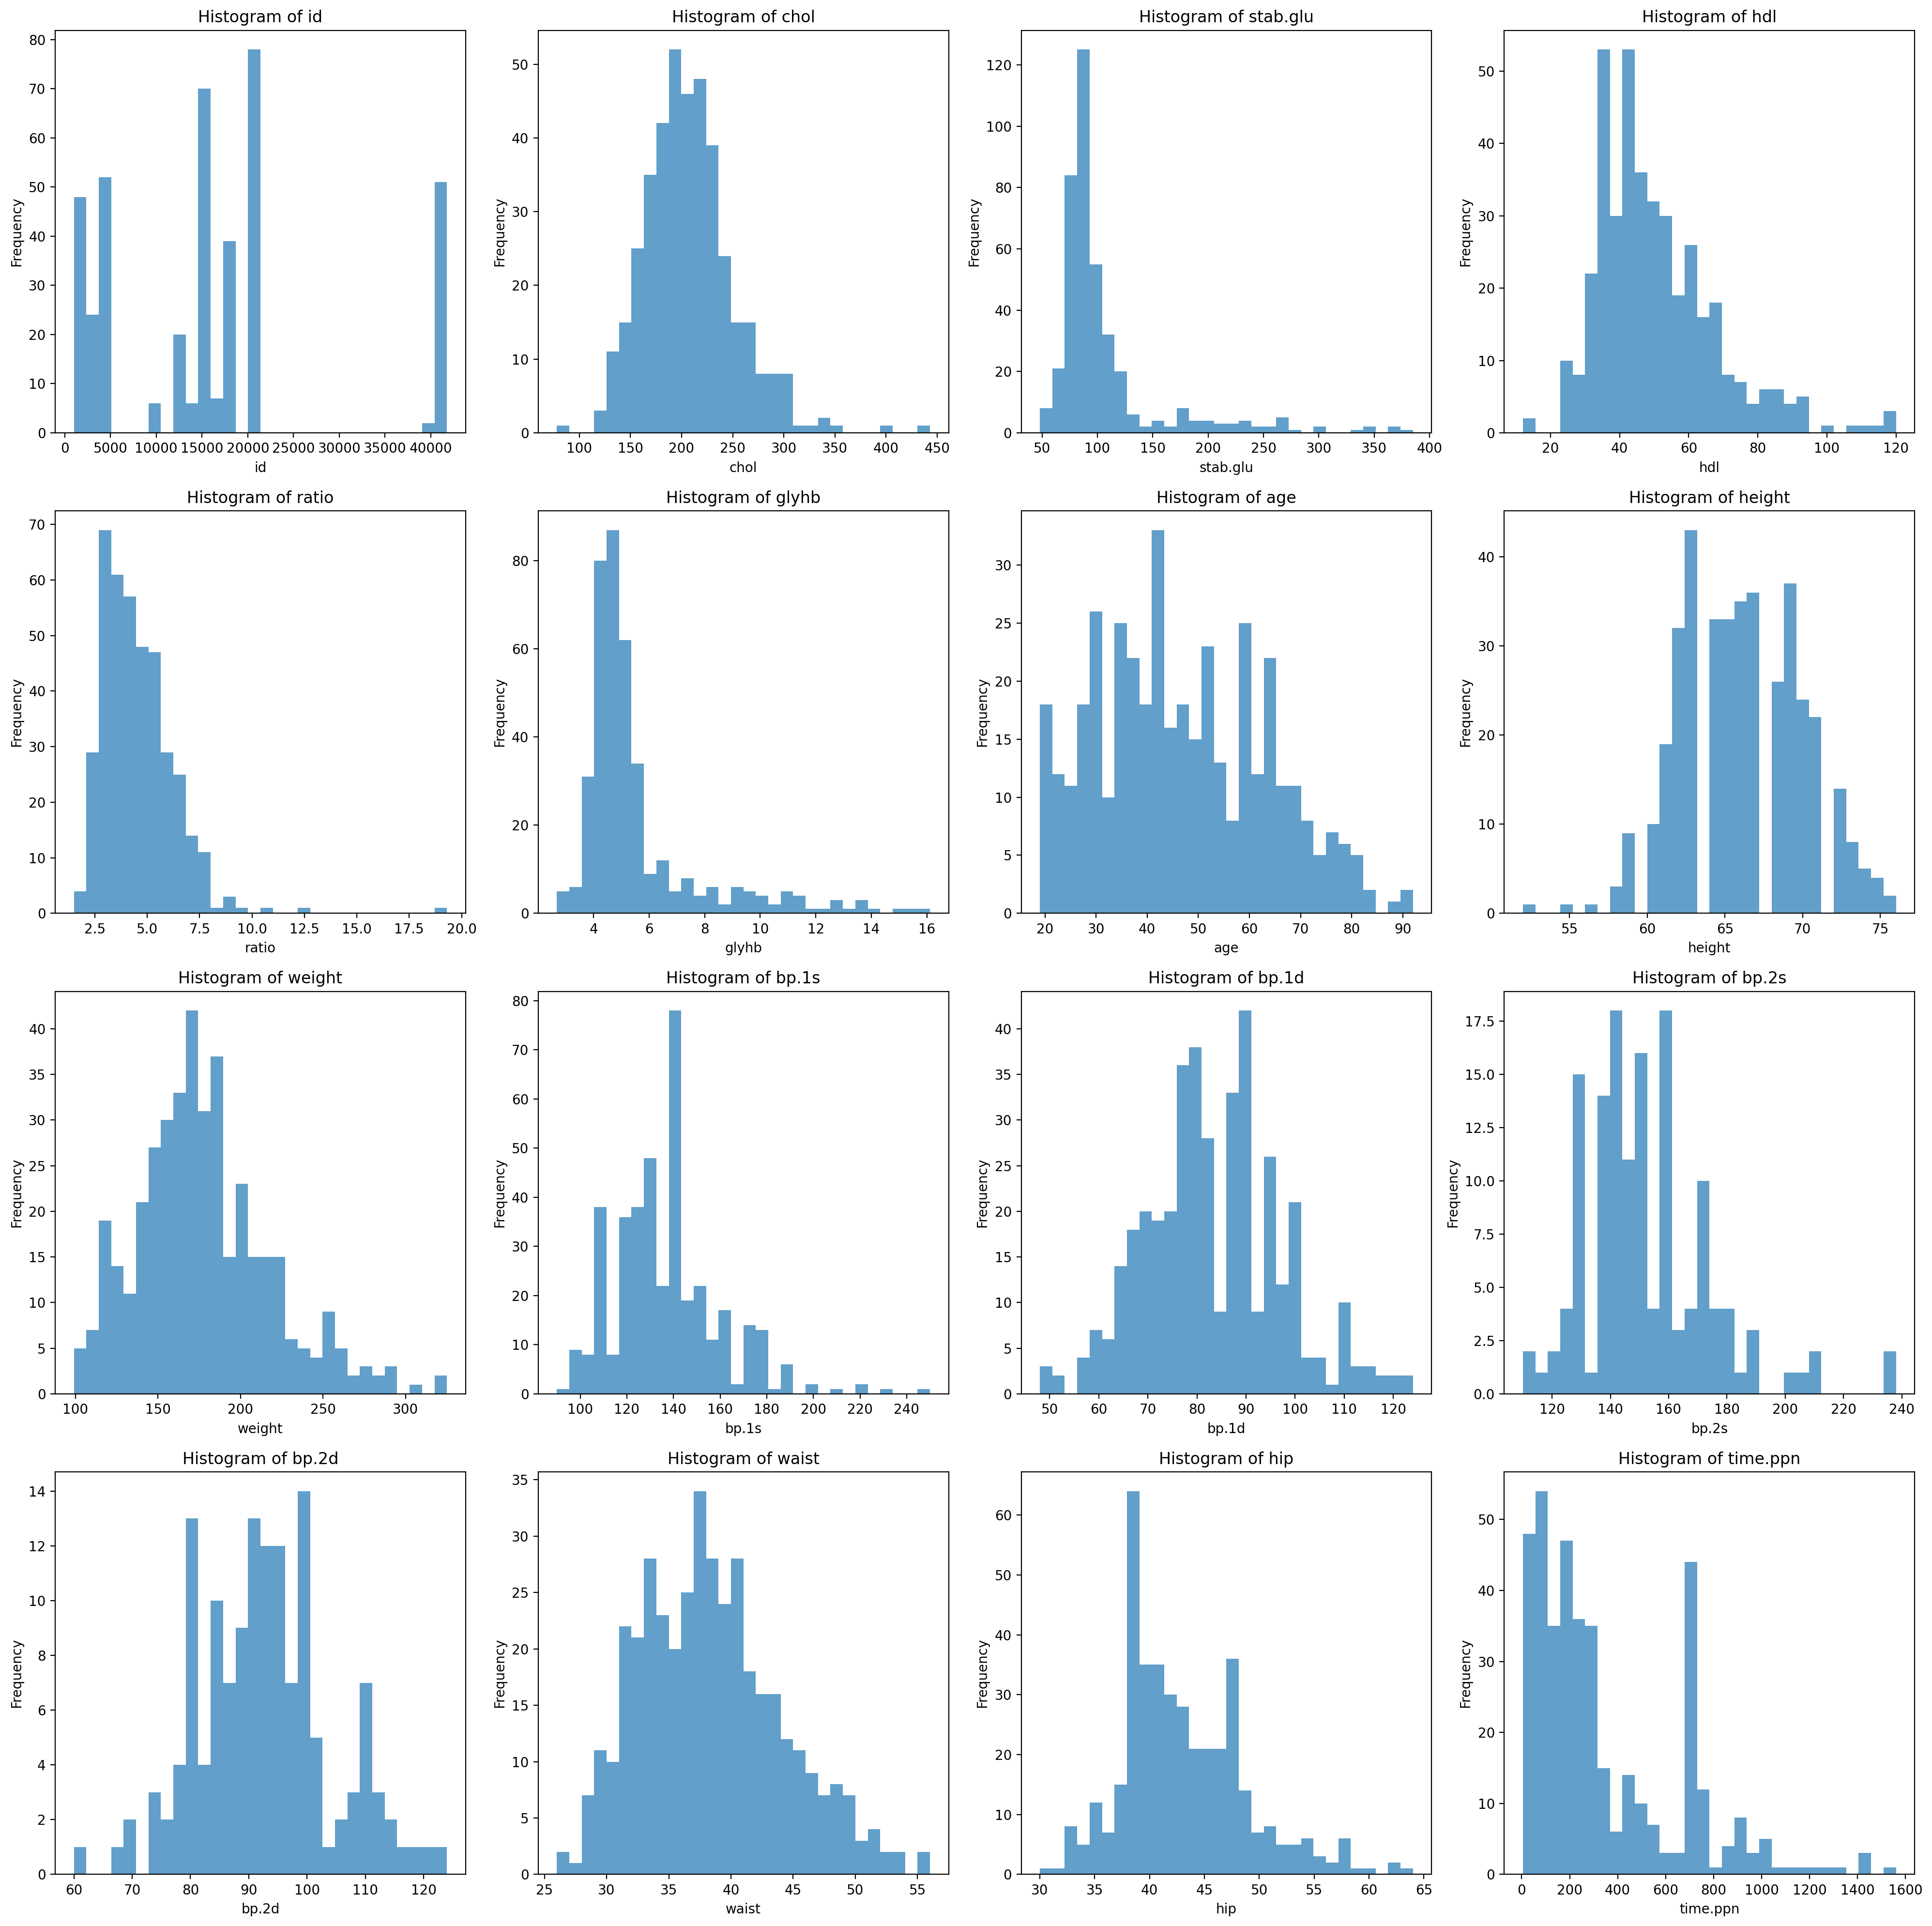

In [ ]:
cols = data_diabetes.select_dtypes(include='number').columns

n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, item in enumerate(cols):
    axes[i].hist(data_diabetes[item].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {item}')
    axes[i].set_xlabel(item)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Preprocessing

### a. Remove Unnecessary Columns

In [ ]:
data_diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
categorical_columns = ['location', 'gender', 'id', 'frame']

data_diabetes_noid = data_diabetes.drop(categorical_columns, axis=1)
data_diabetes_noid

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,203.0,82,56.0,3.6,4.310000,46,62.0,121.0,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.440000,29,64.0,218.0,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.640000,58,61.0,256.0,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.630000,67,67.0,119.0,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.720000,64,68.0,183.0,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,53,69.0,173.0,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,284.0,89,54.0,5.3,4.390000,51,63.0,154.0,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,194.0,269,38.0,5.1,13.630000,29,69.0,167.0,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,199.0,76,52.0,3.8,4.490000,41,63.0,197.0,120.0,78.0,NaN,NaN,41.0,48.0,255.0


### b. Fill in Blank Data

In [ ]:
data_diabetes_noid.isnull().sum()

,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,13
...,...
bp.2s,262
bp.2d,262
waist,2
hip,2


In [ ]:
data_mean = ["bp.2s","bp.1s","bp.2d","bp.1d","chol","height","weight"]
for data in data_mean:
    data_diabetes_noid[data] = data_diabetes_noid[data].fillna(data_diabetes_noid[data].mean())

data_median = ["hdl","ratio","glyhb","waist","hip","time.ppn"]
for data in data_median:
    data_diabetes_noid[data] = data_diabetes_noid[data].fillna(data_diabetes_noid[data].median())

In [ ]:
def glyhb_category(x):
    if x < 5.7:
        return "normal"
    elif x < 6.5:
        return "prediabetes"
    else:
        return "diabetes"

data_diabetes_noid["glyhb_cat"] = data_diabetes_noid["glyhb"].apply(glyhb_category)
data_diabetes_noid

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb_cat
0,203.0,82,56.0,3.6,4.310000,46,62.0,121.0,118.0,59.0,152.382979,92.524823,29.0,38.0,720.0,normal
1,165.0,97,24.0,6.9,4.440000,29,64.0,218.0,112.0,68.0,152.382979,92.524823,46.0,48.0,360.0,normal
2,228.0,92,37.0,6.2,4.640000,58,61.0,256.0,190.0,92.0,185.000000,92.000000,49.0,57.0,180.0,normal
3,78.0,93,12.0,6.5,4.630000,67,67.0,119.0,110.0,50.0,152.382979,92.524823,33.0,38.0,480.0,normal
4,249.0,90,28.0,8.9,7.720000,64,68.0,183.0,138.0,80.0,152.382979,92.524823,44.0,41.0,300.0,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,53,69.0,173.0,138.0,94.0,130.000000,94.000000,35.0,39.0,210.0,diabetes
399,284.0,89,54.0,5.3,4.390000,51,63.0,154.0,140.0,100.0,146.000000,102.000000,32.0,43.0,180.0,normal
400,194.0,269,38.0,5.1,13.630000,29,69.0,167.0,120.0,70.0,152.382979,92.524823,33.0,40.0,20.0,diabetes
401,199.0,76,52.0,3.8,4.490000,41,63.0,197.0,120.0,78.0,152.382979,92.524823,41.0,48.0,255.0,normal


### c. Split Dataset

In [ ]:
X = data_diabetes_noid.drop(['glyhb_cat', 'glyhb'], axis=1)
y = data_diabetes_noid['glyhb_cat']

### d. Normalization Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns, 
    index=X_train.index     
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

## 5. Modelling

### a. Set the Criterion of Model and Optimizer

In [ ]:
def _(model, nn, torch):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
    return criterion, optimizer

### b. Make Model

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=14,h1=12, h2=24, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

### c. Train Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

In [ ]:
epochs = 500
losses = []

for attribute in range(epochs):
    # Go forward
    y_pred = model.forward(X_train_tensor)

    # Measure the loss
    loss = criterion(y_pred, y_train_tensor)

    # Keep track
    losses.append(loss.detach().numpy())

    # Print every 10 seconds
    if attribute % 10 == 0:
        print(f'Epoch: {attribute} and loss: {loss}')

    # Back propagation 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.2946540117263794
Epoch: 10 and loss: 0.671233057975769
Epoch: 20 and loss: 0.5365297198295593
Epoch: 30 and loss: 0.43554142117500305
Epoch: 40 and loss: 0.3708252012729645
Epoch: 50 and loss: 0.3270675837993622
Epoch: 60 and loss: 0.29064038395881653
Epoch: 70 and loss: 0.26063159108161926
Epoch: 80 and loss: 0.2304534614086151
Epoch: 90 and loss: 0.2030336856842041
Epoch: 100 and loss: 0.17603090405464172
Epoch: 110 and loss: 0.15256576240062714
Epoch: 120 and loss: 0.13062341511249542
Epoch: 130 and loss: 0.10889282077550888
Epoch: 140 and loss: 0.08873827755451202
Epoch: 150 and loss: 0.07104077935218811
Epoch: 160 and loss: 0.0561528243124485
Epoch: 170 and loss: 0.04466526582837105
Epoch: 180 and loss: 0.03544626757502556
Epoch: 190 and loss: 0.02777227573096752
Epoch: 200 and loss: 0.021691910922527313
Epoch: 210 and loss: 0.016905315220355988
Epoch: 220 and loss: 0.013405348174273968
Epoch: 230 and loss: 0.011004450730979443
Epoch: 240 and loss: 0.009248313

## 6. Plot the Model

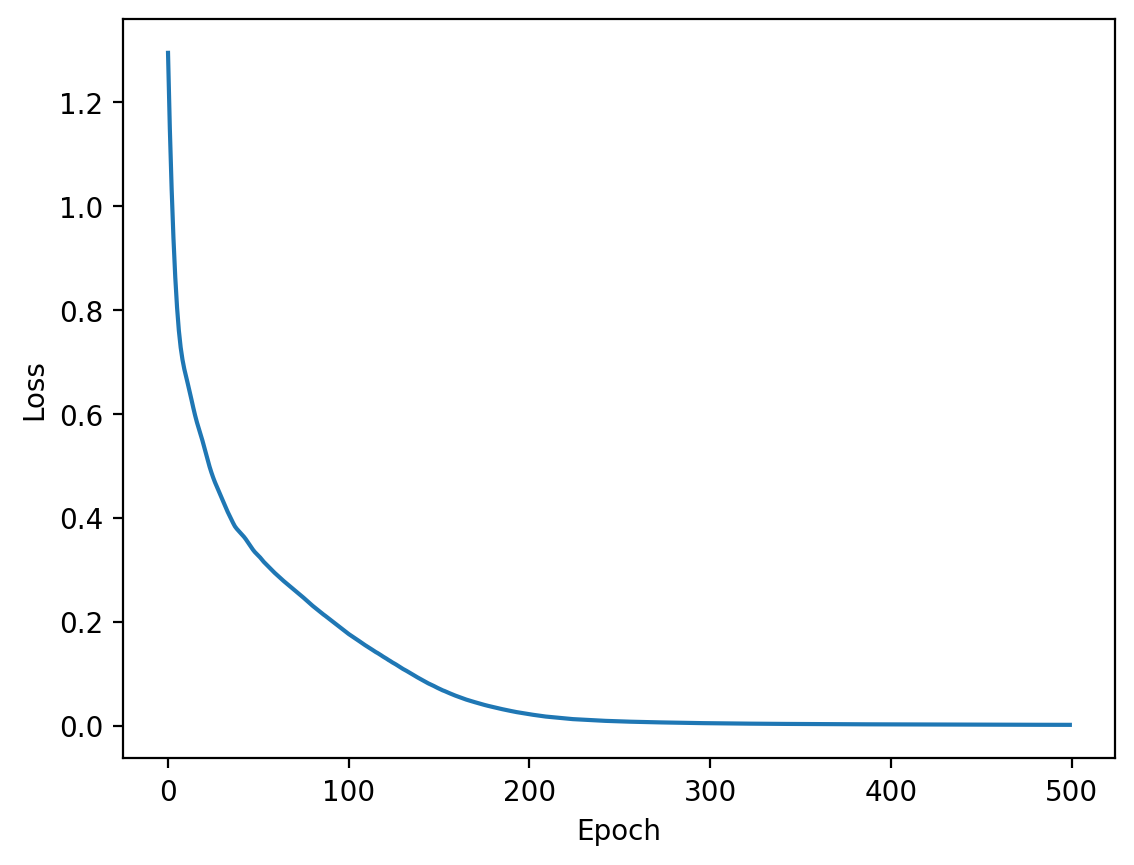

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

## 7. Test the Model

In [ ]:
with torch.no_grad():
    y_eval = model.forward(X_test_tensor)
    loss_model = criterion(y_eval, y_test_tensor)

In [ ]:
loss_model

tensor(2.0726)

In [ ]:
correct = 0
with torch.no_grad():
     for x, datas in enumerate(X_test_tensor): 
        y_val_test = model.forward(datas)

        # Gunakan [x], bukan [i]
        print(f'{x+1}.) {str(y_val_test)} \t {y_test_tensor[x]}')

        # Bandingkan dengan indeks yang benar
        if y_val_test.argmax().item() == y_test_tensor[x]:
            correct += 1

print(f'We got {correct} correct')

1.) tensor([ -0.4961,  45.8858, -81.9778]) 	 1
2.) tensor([-24.3628,  66.4292, -86.5323]) 	 1
3.) tensor([-18.6126,  19.5420, -10.5602]) 	 1
4.) tensor([-24.7689,  15.9208,  -5.1124]) 	 1
5.) tensor([-35.0224,  17.5388,   2.6208]) 	 1
6.) tensor([ 25.7688,  -4.4062, -24.6146]) 	 0
7.) tensor([-3.2046e+01,  1.4039e+01,  1.4643e-02]) 	 1
8.) tensor([-10.5653,  44.7069, -70.3303]) 	 1
9.) tensor([-21.2717,  18.2853,  -9.3016]) 	 1
10.) tensor([-23.5732,  20.4982, -10.8498]) 	 1
11.) tensor([-35.2012,  16.0858,   3.6963]) 	 1
12.) tensor([-25.9662,   5.5362,  11.1214]) 	 1
13.) tensor([   1.5872,   58.0666, -114.3352]) 	 1
14.) tensor([ 12.3943,  13.1343, -47.7084]) 	 1
15.) tensor([ 16.6807,  25.0204, -66.4264]) 	 1
16.) tensor([-20.1282,  29.9168, -30.8022]) 	 1
17.) tensor([-35.9728,  32.2503, -15.9912]) 	 1
18.) tensor([-17.4177,  16.0620, -15.5027]) 	 1
19.) tensor([-59.7708,  34.7077,  -0.8783]) 	 1
20.) tensor([-35.6615,  16.9031,   3.9252]) 	 1
21.) tensor([-10.9457,   9.7197,  -6.